In [35]:
import SimRunner as sr
from infoenginessims.simprocedures import basic_simprocedures as sp
%load_ext jupyternotify
#this class hides many details. to see everything that is happening you must study the SimRunner.py file 
# as well as sus.kyle_tools.multisim


bfr = sr.BitFlipRunner()

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"

from IPython.display import HTML
import matplotlib.animation as animation
%matplotlib inline

import importlib
import kyle_tools.heplerFunctionBitFlip as heplerFunctionBitFlip
heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)

In [62]:
#setting up parameters
# try to create a ParamGuider class from source.kyle_tools.multisim OR make your own similar class in order to 
# 'optimize' this bit flip. By optimize, I mean to find a protocol that has low work but also high fidelity.  
# Keep lambda at .5 but feel free to change the other parameters.

p_vals={}
p_vals['lambda']=0.5
p_vals['N'] = 10_000
p_vals['dt'] = 1/1_000
p_vals['k'] = np.pi**2
p_vals['tau'] = 1
p_vals['noise'] = True # If true, then the white gaussian noise term is included in the simmulation
p_vals['depth'] = -20
p_vals['location'] = 2
p_vals["shifted"] = -20


bfr.change_params(p_vals) # this is a method in SimManager, defined in multisim


In [63]:
bfr.run_sim() # defined in kyle_tools/multism.py


 initializing...
the parameters:  [(-1.25, -1.25), (20.0, 20.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10093 samples out of 10000
 running sim...

 analyzing output...


In [64]:
all_state = bfr.sim.output.all_state["states"]

In [65]:
x_range = np.linspace(-1.5, 1.5, 1000)
comp_potential_parameters = bfr.system.potential.default_params
comp_potential = 1/2 * comp_potential_parameters[1] * x_range**2

store_potential_parameters = bfr.eq_system.potential.default_params
print(comp_potential_parameters)



[0, 9.869604401089358]


In [66]:
heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)
energy_time_series = heplerFunctionBitFlip.get_energy_time_series(bfr, all_state)
number_of_particles = bfr.sim.ntrials

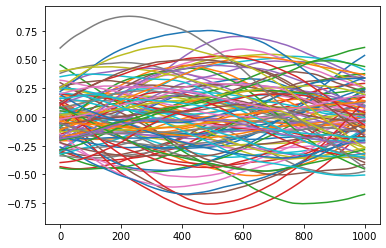

In [67]:
for x in range(number_of_particles)[::100]:
    plt.plot(all_state[x, :, :, 0])


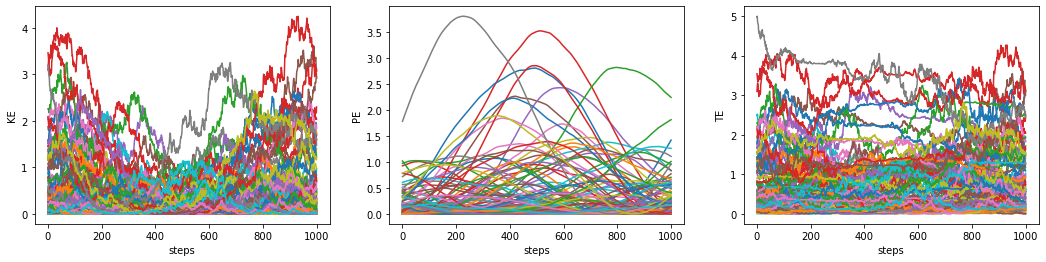

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(18,4))

steps = 100

ax[0].set_xlabel("steps")
ax[0].set_ylabel("KE")   
for x in range(number_of_particles)[0::steps]:
    ax[0].plot(energy_time_series[x, :, :, 0])

ax[1].set_xlabel("steps")
ax[1].set_ylabel("PE")   
for x in range(number_of_particles)[0::steps]:
    ax[1].plot(energy_time_series[x, :, :, 1]) # PE graph

ax[2].set_xlabel("steps")
ax[2].set_ylabel("TE")   
for x in range(number_of_particles)[0::steps]:
    ax[2].plot(energy_time_series[x, :, :, 2]) # TE graph

plt.show()

In [69]:
final_W = bfr.sim.output.final_W

(array([1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 1.200e+01, 1.200e+01,
        1.400e+01, 3.000e+01, 3.900e+01, 4.600e+01, 7.200e+01, 1.280e+02,
        1.880e+02, 2.590e+02, 4.080e+02, 6.800e+02, 1.278e+03, 2.499e+03,
        1.252e+03, 8.150e+02, 5.650e+02, 4.190e+02, 3.240e+02, 2.170e+02,
        1.840e+02, 1.560e+02, 9.000e+01, 6.900e+01, 5.300e+01, 5.400e+01,
        2.900e+01, 2.200e+01, 1.800e+01, 1.300e+01, 1.800e+01, 5.000e+00,
        4.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00]),
 array([-2.67001667, -2.55602475, -2.44203283, -2.3280409 , -2.21404898,
        -2.10005706, -1.98606513, -1.87207321, -1.75808129, -1.64408936,
        -1.53009744, -1.41610552, -1.30211359, -1.18812167, -1.07412975,
        -0.96013782, -0.8461459 , -0.73215398, -0.61816205, -0.50417013,
        -0.39017821, -0.27618629, -0.16219436, -0.04820244,  0.06578948,
         0.

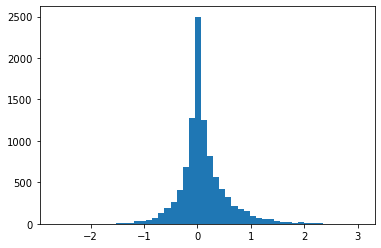

In [70]:
plt.hist(final_W, bins = 50)

In [72]:
max_W = max(final_W)
min_W = min(final_W)
print(f"max work = {max(final_W)}")
print(f"min work = {min(final_W)}")

unmodified_jarzyn = np.mean(np.exp(-final_W))
print(f"unmodified jarzynski =", unmodified_jarzyn)

modified_jarzyn = np.mean(np.exp(-np.sort(final_W)[1:]))
print(f"after removing the most negative term, I get ", modified_jarzyn)

max work = 3.0295794906885347
min work = -2.670016674362573
unmodified jarzynski = 0.9959809846446002
after removing the most negative term, I get  0.99463642729012


In [15]:
print("The most negative 5 work done is:")
print(sorted(final_W)[0:5])

The most negative 5 work done is:
[-3.2907216092751916, -3.1031810252219163, -3.0983025107332933, -2.791600292073455, -2.7257097154642076]


In [16]:
fidelity_rate = heplerFunctionBitFlip.evaluateFidelityRate(bfr.sim.output.all_state["states"])
print(fidelity_rate)

94.8


# single sweep

In [551]:
# override only collecting 200 states 
bfr.procs[2] = sp.MeasureAllState()

In [539]:
%%notify
sweepObject = {
    "lambda":   0.5,
    "N":        10_000,
    #"dt":       [1/1_000, 1/5_000, 1/10_000, 1/50_000, 1/100_000],
    "dt":       1/5_000,
    "k":        np.pi**2,
    "tau":      1,
    "depth":    1,
    "location": 1
}
bfr.change_params(sweepObject)
bfr.run_sim(verbose=True)



 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10048 samples out of 10000
 running sim...

 analyzing output...


<IPython.core.display.Javascript object>

# verification of the precision of the simulation for dt = 1/1_000
- In the following section, I will assess the accuracy of the simulation's position with dt = 1/1_000. 
- The precision of the work done is heavily dependent on the accuracy of the position, as the evaluation of work done involves comparing the potential energy before and after the protocol.

## (a) position evaluation (compare with the analytic solution)

The solution of a damped oscillator is 
$$x(t) = C_1 exp(-\alpha t) cos(\gamma t) + C_2 exp(-\alpha t) sin(\Omega t)$$
$$v(t) = exp(-\alpha t) [(C_1 \alpha + C_2 \Omega) cos(\Omega t) - (C_1 \Omega + C_2 \alpha) sin(\Omega t)]$$
$$\alpha = \lambda/2, \Omega = \sqrt{k - \alpha^2}$$
$$C_1 = x_0, C_2 = \frac{v_0 + x_0 \alpha}{\Omega}$$

## conclusion:
- We find that the max error in the position is about 1e-2

In [376]:
# set up parameters and time
alpha = sweepObject["lambda"]/2
omega_1 = np.sqrt(sweepObject["k"] - alpha**2)
t = np.pi / np.sqrt(sweepObject["k"])

In [377]:
# get the final_state and analytic_final_state
initial_state = bfr.sim.initial_state
final_state = bfr.sim.output.final_state

# calculate the analytical final states
analytic_final_state = final_state.copy()

C_1 = initial_state[:, :, 0]
C_2 = (initial_state[:, :, 1] + initial_state[:, :, 0] * alpha)/omega_1
analytic_final_state[:, :, 0] = np.exp(-alpha * t) * (C_1 * np.cos(omega_1 * t) + C_2 * np.sin(omega_1 * t))
analytic_final_state[:, :, 1] = np.exp(-alpha * t) * ((C_1 * -alpha + C_2 * omega_1) * np.cos(omega_1 * t) - \
                                                      (C_1 * omega_1 + C_2 * alpha) * np.sin(omega_1 * t))

In [378]:
position_error = analytic_final_state[:, :, 0] - final_state[:, :, 0]
velocity_error = analytic_final_state[:, :, 1] - final_state[:, :, 1]

In [379]:
# the maximum error of the position
print(max(np.abs(position_error)), max(np.abs(velocity_error)))


[1.48769885e-14] [3.64153152e-14]


In [380]:
len(bfr.sim.output.final_W)

10000

# (b) work done evaluation
- In this section, I want to compare the result of the work done calculated from the simulation and the analytic solution.

conclusion:
- The difference in mean work done are small

In [381]:
final_W = bfr.sim.output.final_W

# work done from analytic solution
U0 = bfr.system.get_potential(initial_state, 0) - bfr.eq_system.get_potential(analytic_final_state, 0)
UF = bfr.eq_system.get_potential(final_state, 0) - bfr.system.get_potential(analytic_final_state, 0)
analytical_final_W = U0 + UF

print("The mean work done of the simulation result is:", np.mean(final_W))
print("The mean work done of the analytical result is:", np.mean(analytical_final_W))

The mean work done of the simulation result is: 1.5934798583212757
The mean work done of the analytical result is: 1.6156491813272398


# (c) Flip evaluation

In this section, I use the initial and final states to evaluate the fidelity rate of the system. 

## conclusion:
- I found that the fidelity rate is high.
- The bad bits are the one with small initial position.  

In [382]:
initial_bit_value = np.sign(initial_state[:,:,0])
final_bit_value = np.sign(final_state[:, :, 0])

# to get the index of good bits and bad bits
fidelity_index = (initial_bit_value != final_bit_value)
infidelity_index = (initial_bit_value == final_bit_value)

In [383]:
fidelity_rate = np.sum(fidelity_index) / len(initial_bit_value) * 100
print("The fidelity rate is ", fidelity_rate) 

The fidelity rate is  99.97


# (d) checking fluctuation theorem

- The Jarzynski equation is ⟨exp(−βW)⟩ = exp(−βΔF)
- ∆F = 0 as the initial potential and final potentials are the same and thus the parition functions are the same.

In [147]:
final_W = bfr.sim.output.final_W
np.mean(np.exp(-final_W))

1.090817417516401

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  2.,  1.,  0.,  3.,  6.,
         5.,  0.,  5.,  5.,  4.,  8.,  3.,  7.,  8., 11., 11., 14., 13.,
        14., 15., 27., 32., 26., 38., 31., 16., 31., 22., 29., 23., 28.,
        31., 19., 28., 34., 24., 21., 29., 28., 12., 23., 26., 17., 22.,
        15., 17., 12., 15., 20.,  9., 20., 16., 13., 10., 12., 10.,  8.,
         9., 10.,  6.,  4.,  8.,  3.,  4.,  4.,  0.,  3.,  1.,  4.,  1.,
         1.,  2.,  0.,  0.,  1.,  1.,  1.,  0.,  1.]),
 array([-5.16600458, -5.04516227, -4.92431995, -4.80347763, -4.68263531,
        -4.561793  , -4.44095068, -4.32010836, -4.19926605, -4.07842373,
        -3.95758141, -3.83673909, -3.71589678, -3.59505446, -3.47421214,
        -3.35336983, -3.23252751, -3.11168519, -2.99084287, -2.87000056,
        -2.74915824, -2.62831592, -2.50747361, -2.38663129, -2.26578897,
        -2.14494665, -2.02410434, -1.90326202, -1.7824197 , -1.661577

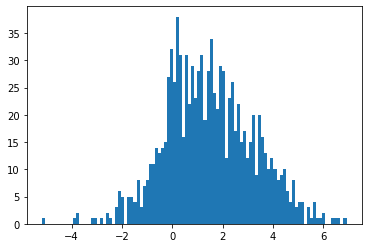

In [90]:
plt.hist(final_W, bins = 100)

naive jarzynski: average of exp -Beta W is 1.090817417516401
binned jarzynski: binned average of exp -Beta W using only values of work where we have +W and -W realizations: 1.0993638458259118
this means ignoring 1.7 percent of trials


/Users/edwardtang/Project/source/kyle_tools/fluctuation_theorems.py:103: RuntimeWarning: divide by zero encountered in true_divide
  log_ratio = np.log(np.divide(pos_counts, neg_counts))


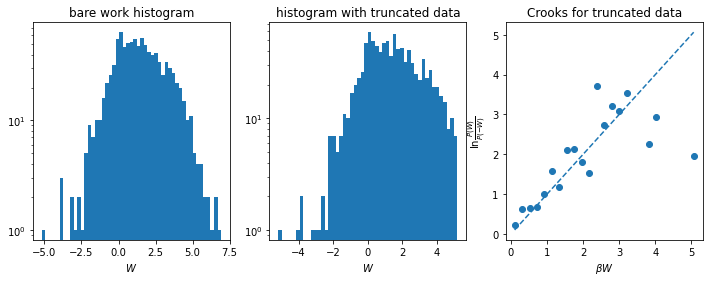

(array([0.10332009, 0.30996027, 0.51660046, 0.72324064, 0.92988082,
        1.13652101, 1.34316119, 1.54980137, 1.75644156, 1.96308174,
        2.16972192, 2.37636211, 2.58300229, 2.78964247, 2.99628266,
        3.20292284, 3.40956302, 3.61620321, 3.82284339, 4.02948357,
        4.23612376, 4.44276394, 4.64940412, 4.85604431, 5.06268449]),
 [array([47, 26, 23, 20, 17, 10, 11,  7,  5,  7,  7,  1,  2,  1,  1,  1,  0,
          0,  2,  1,  0,  0,  0,  0,  1]),
  array([59, 49, 44, 39, 47, 49, 36, 57, 42, 43, 32, 41, 31, 25, 22, 34, 23,
         27, 19, 19, 16, 14,  8, 10,  7])])

In [148]:
crooks_analysis_tsp(final_W)

In [366]:
def get_analytical_final_state(initial_state):
    # this function is for underdamped situation
    analytic_final_state = initial_state.copy()
    C_1 = initial_state[:, :, 0]
    C_2 = (initial_state[:, :, 1] + initial_state[:, :, 0] * alpha)/omega_1
    analytic_final_state[:, :, 0] = np.exp(-alpha * t) * (C_1 * np.cos(omega_1 * t) + C_2 * np.sin(omega_1 * t))
    analytic_final_state[:, :, 1] = np.exp(-alpha * t) * ((C_1 * -alpha + C_2 * omega_1) * np.cos(omega_1 * t) - \
                                                          (C_1 * omega_1 + C_2 * alpha) * np.sin(omega_1 * t))
    return analytic_final_state

# MultiTest: Time sweep analysis

In [186]:
%%notify
dt_list = [1/1_000, 1/5_000, 1/10_000, 1/20_000, 1/30_000, 1/40_000, 1/50_000, 1/60_000, 1/80_000, 
           1/90_000, 1/100_000]
 

for dt in dt_list:
    sweepObject = {
        "lambda":   0.5,
        "N":        10_000,
        "dt":       dt,
        "k":        np.pi**2,
        "tau":      1,
        "depth":    1,
        "location": 1
    }
    bfr.change_params(sweepObject)
    bfr.run_sim(verbose=True)
    initial_position = bfr.sim.initial_state
    final_position = bfr.sim.output.final_state
    work_done = bfr.sim.output.final_W
    
    np.save(f"x_position_with_dt_{dt}_(with_dapming_no_noise).npy", np.asarray([initial_position, final_position]))
    np.save(f"work_done_with_dt_{dt}_(with_dapming_no_noise).npy", np.asarray(work_done))


 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10000 samples out of 10000
 running sim...

 analyzing output...

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10033 samples out of 10000
 running sim...

 analyzing output...

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10014 samples out of 10000
 running sim...

 analyzing output...

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10016 samples out of 10000
 running sim...

 analyzing output...

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10070 samples out of 10000
 running sim...

 analyzing output...


<IPython.core.display.Javascript object>

# precision test
- In the following section, I compare the result of the simulation and the analytic solution to see how large the error in the position will be. 
- I used the time steps for dt = [0.001, 0.0002, 0.0001, 2e-05, 1e-05]
- I found that as time steps are too small, the error in position can grow up to 1e-5
- the error may be come from the integrator.

## (a) precision of the position (comparing with the analytic solution)

In [232]:
def createErrorPrecisionList(_dt):
    array = []
    data = np.load(f"x_position_with_dt_{_dt}_(with_dapming_no_noise).npy")
    initial_state = data[0]
    final_state = data[1]
    analytic_final_state = get_analytical_final_state(initial_state)
    max_error_for_x = max(np.abs(final_state[:, :, 0] - analytic_final_state[:, :, 0]))[0]
    max_error_for_v = max(np.abs(final_state[:, :, 1] - analytic_final_state[:, :, 1]))[0]
    plt.hist(np.abs(final_state[:, :, 0] - analytic_final_state[:, :, 0]))
    plt.show()
    plt.hist(np.abs(final_state[:, :, 1] - analytic_final_state[:, :, 1]))
    plt.show()
    return (_dt, max_error_for_x, max_error_for_v)

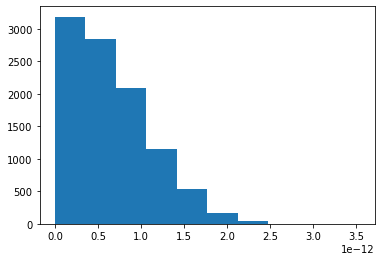

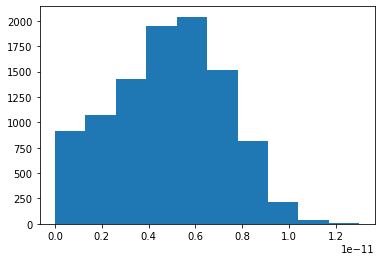

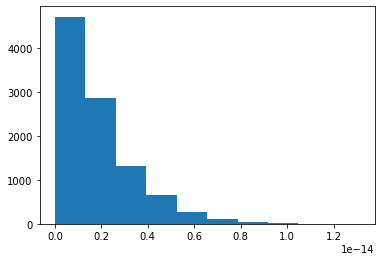

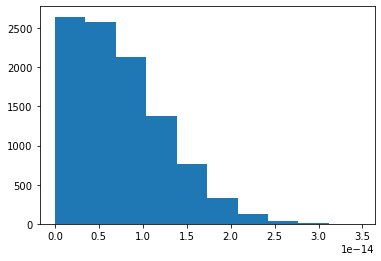

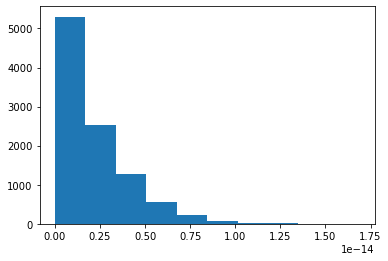

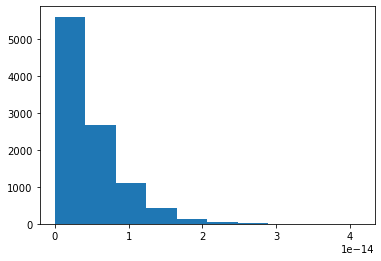

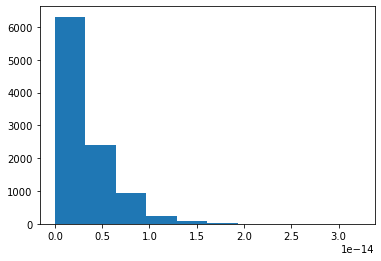

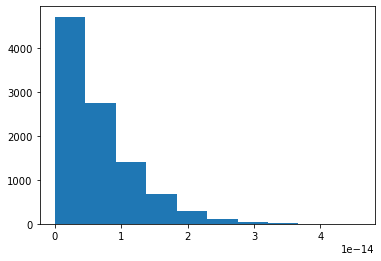

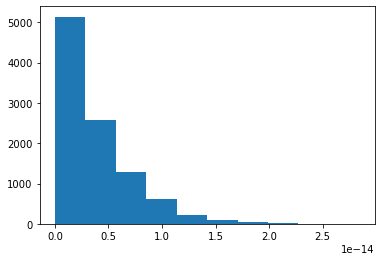

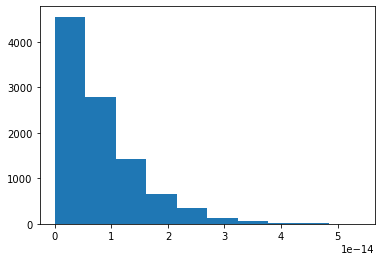

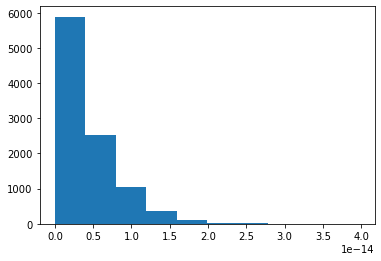

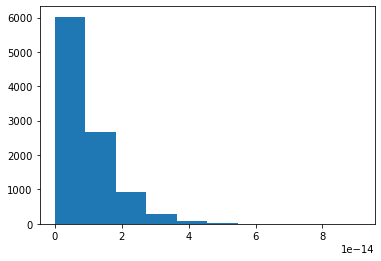

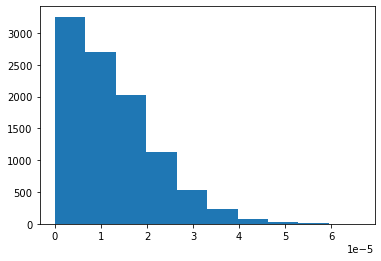

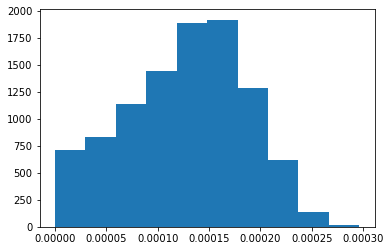

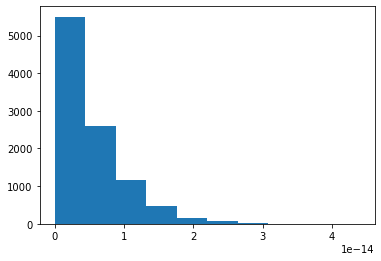

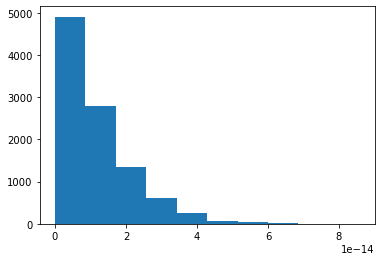

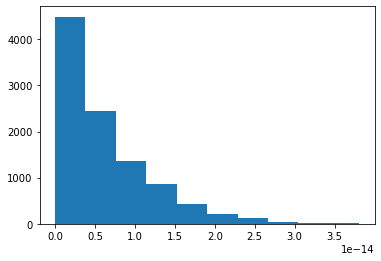

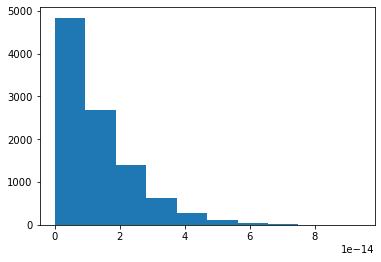

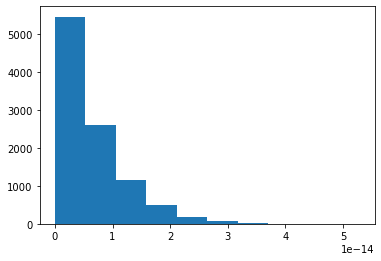

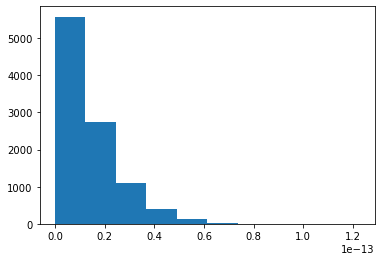

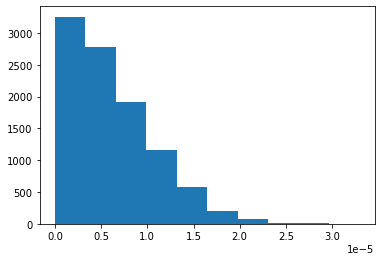

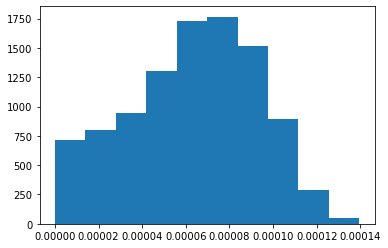

In [233]:
position_error_list = np.asarray([createErrorPrecisionList(_dt) for _dt in dt_list])

In [227]:
position_error_list

array([[1.00000000e-03, 3.53961305e-12, 1.30007116e-11],
       [2.00000000e-04, 1.31006317e-14, 3.46389584e-14],
       [1.00000000e-04, 1.68753900e-14, 4.13002965e-14],
       [5.00000000e-05, 3.21964677e-14, 4.58522109e-14],
       [3.33333333e-05, 2.84217094e-14, 5.38458167e-14],
       [2.50000000e-05, 3.97459843e-14, 9.10382880e-14],
       [2.00000000e-05, 6.60888960e-05, 2.96144470e-04],
       [1.66666667e-05, 4.39648318e-14, 8.57092175e-14],
       [1.25000000e-05, 3.80806497e-14, 9.37028233e-14],
       [1.11111111e-05, 5.28466160e-14, 1.22568622e-13],
       [1.00000000e-05, 3.29388849e-05, 1.39495912e-04]])

In [228]:
position_error_list[:, 0]

array([1.00000000e-03, 2.00000000e-04, 1.00000000e-04, 5.00000000e-05,
       3.33333333e-05, 2.50000000e-05, 2.00000000e-05, 1.66666667e-05,
       1.25000000e-05, 1.11111111e-05, 1.00000000e-05])

[  1000.   5000.  10000.  20000.  30000.  40000.  50000.  60000.  80000.
  90000. 100000.]


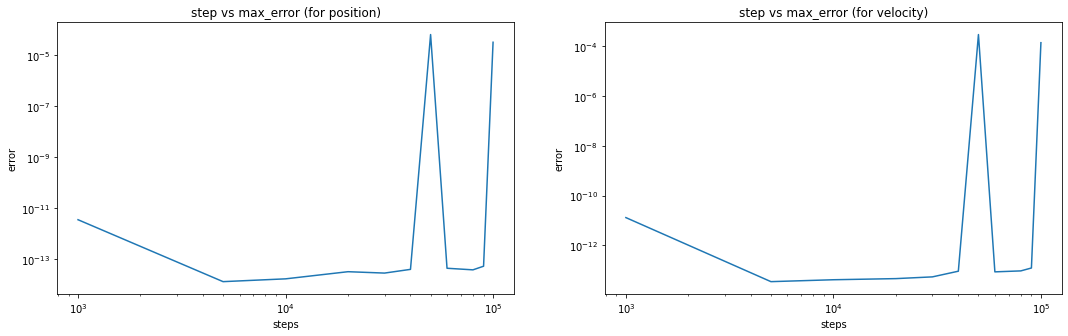

In [229]:
print(1/position_error_list[:, 0])
fig, ax = plt.subplots(1, 2, figsize=(18,5))
ax[0].set_title("step vs max_error (for position)")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("steps")
ax[0].set_ylabel("error")
ax[0].plot(1/position_error_list[:, 0], position_error_list[:, 1])

ax[1].set_title("step vs max_error (for velocity)")
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlabel("steps")
ax[1].set_ylabel("error")

ax[1].plot(1/position_error_list[:, 0], position_error_list[:, 2])
plt.show()

## (a2) energy test

In [205]:
def createEnergyPrecisionList(_dt):
    array = []
    data = np.load(f"x_position_with_dt_{_dt}_(with_dapming_no_noise).npy")
    initial_state = data[0]
    final_state = data[1]
    
    initial_v = initial_state[:, :, 1]
    final_v = final_state[:, :, 1]
    
    initial_KE = 1/2 * initial_v**2
    final_KE   = 1/2 * final_v**2
    initial_PE = bfr.system.get_potential(initial_state, 0).reshape(-1, 1)
    final_PE   = bfr.system.get_potential(final_state, 0).reshape(-1, 1)
    
    
    inital_TE = initial_KE + initial_PE
    final_TE = final_KE + final_PE
    
    return final_TE - inital_TE



In [208]:
# initial TE and final TE are not the same?
createEnergyPrecisionList(dt_list[3])

array([[-1.71844481],
       [-2.53344847],
       [-2.06569505],
       ...,
       [-3.09510264],
       [-1.87269693],
       [-3.918527  ]])

## (b) precision of the fidelity
- conclusion: The fidelity is very good in this situation.

In [211]:
def createFidelityList(_dt):
    array = []
    data = np.load(f"x_position_with_dt_{_dt}_(with_dapming_no_noise).npy")
    initial_x_bit = np.sign(data[0][:, :, 0])
    final_x_bit = np.sign(data[1][:, :, 0])

    
    total_number_of_bit = len(initial_x_bit)
    bad_bits = np.sum(initial_x_bit == final_x_bit)
    good_bits = np.sum(initial_x_bit != final_x_bit)
    
    return (1/_dt, good_bits / total_number_of_bit)

fidelityDataArray = [createFidelityList(_dt) for _dt in dt_list]

In [212]:
fidelityDataArray

[(1000.0, 0.9993),
 (5000.0, 0.9992),
 (10000.0, 0.9998),
 (20000.0, 0.9997),
 (30000.0, 0.9994),
 (40000.0, 0.9996),
 (49999.99999999999, 0.9994),
 (60000.0, 0.9997),
 (80000.0, 0.9997),
 (90000.0, 0.9998),
 (99999.99999999999, 0.9994)]

## (c) work done analysis
- check the Jarzynski term

In [332]:
def createWorkDoneList(_dt, _filter = False, _delta = 0):
    work_done = np.load(f"bit_flip_np_data/work_done_with_dt_{_dt}_(with_dapming_no_noise).npy")
    mean_work_done = np.mean(work_done)
    
    
    if _filter == True:
        upperLimit_index = work_done < mean_work_done + _delta
        lowerLimit_index = work_done > mean_work_done - _delta
        combinedIndex = np.logical_and(upperLimit_index, lowerLimit_index)
        work_done = work_done[combinedIndex]
    
    N = len(work_done)
    fluctuation = mean_work_done / np.sqrt(N)
    jarzynski_term = np.mean(np.exp(-work_done))
    
    if _filter == True:
        return (_dt, mean_work_done, fluctuation, jarzynski_term, _delta)
    else:
        return (_dt, mean_work_done, fluctuation, jarzynski_term)

In [333]:
# 0: dt, 1L mean_work_done, 2: fluctuation, 3: jarzynski_term)
_filter = True
workDoneDataArray = np.asarray([createWorkDoneList(_dt, _filter = False, _delta = _detla) \
                                for _dt in dt_list])

print("0: dt, step, 1: mean_work_done, 2: fluctuation, 3: jarzynski_term")
workDoneDataArray

0: dt, step, 1: mean_work_done, 2: fluctuation, 3: jarzynski_term


array([[1.00000000e-03, 1.59445265e+00, 1.59445265e-02, 3.11951554e-01],
       [2.00000000e-04, 1.57356930e+00, 1.57356930e-02, 3.17493376e-01],
       [1.00000000e-04, 1.59260993e+00, 1.59260993e-02, 3.14605431e-01],
       [5.00000000e-05, 1.61168624e+00, 1.61168624e-02, 3.06958854e-01],
       [3.33333333e-05, 1.60038805e+00, 1.60038805e-02, 3.11071028e-01],
       [2.50000000e-05, 1.58514009e+00, 1.58514009e-02, 3.14207107e-01],
       [2.00000000e-05, 1.58469624e+00, 1.58469624e-02, 3.11825480e-01],
       [1.66666667e-05, 1.60839019e+00, 1.60839019e-02, 3.06961778e-01],
       [1.25000000e-05, 1.60394186e+00, 1.60394186e-02, 3.08820031e-01],
       [1.11111111e-05, 1.58479564e+00, 1.58479564e-02, 3.17311863e-01],
       [1.00000000e-05, 1.58308429e+00, 1.58308429e-02, 3.14638685e-01]])

In [92]:
from kyle_tools.fluctuation_theorems import crooks_analysis_tsp

naive jarzynski: average of exp -Beta W is 1.090817417516401
binned jarzynski: binned average of exp -Beta W using only values of work where we have +W and -W realizations: 1.0993638458259118
this means ignoring 1.7 percent of trials


/Users/edwardtang/Project/source/kyle_tools/fluctuation_theorems.py:103: RuntimeWarning: divide by zero encountered in true_divide
  log_ratio = np.log(np.divide(pos_counts, neg_counts))


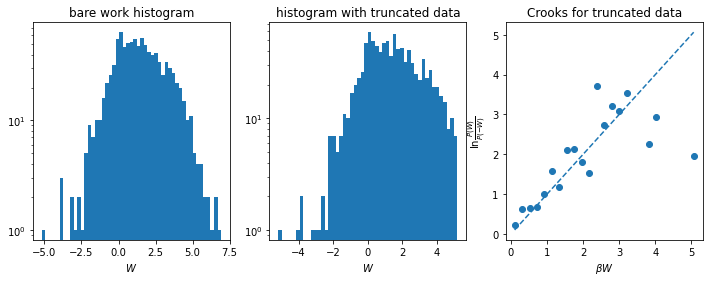

(array([0.10332009, 0.30996027, 0.51660046, 0.72324064, 0.92988082,
        1.13652101, 1.34316119, 1.54980137, 1.75644156, 1.96308174,
        2.16972192, 2.37636211, 2.58300229, 2.78964247, 2.99628266,
        3.20292284, 3.40956302, 3.61620321, 3.82284339, 4.02948357,
        4.23612376, 4.44276394, 4.64940412, 4.85604431, 5.06268449]),
 [array([47, 26, 23, 20, 17, 10, 11,  7,  5,  7,  7,  1,  2,  1,  1,  1,  0,
          0,  2,  1,  0,  0,  0,  0,  1]),
  array([59, 49, 44, 39, 47, 49, 36, 57, 42, 43, 32, 41, 31, 25, 22, 34, 23,
         27, 19, 19, 16, 14,  8, 10,  7])])

In [93]:
crooks_analysis_tsp(final_W)

In [334]:
dt_list[3]

5e-05

In [335]:
# 0: dt = , 1: mean_work_done, 2: fluctuation, 3: jarzynski_term, 4: delta)
_filter = True
_deltaList = np.linspace(0.01, 4, 100)
_dt = dt_list[3]
print(_dt)
workDoneDataArray = np.asarray([createWorkDoneList(_dt, _filter = True, _delta = _d) \
                                for _d in _deltaList])

# print("0: dt, 1L mean_work_done, 2: fluctuation, 3: jarzynski_term, 4: delta")
# workDoneDataArray

5e-05


In [340]:
workDoneDataArray

array([[5.00000000e-05, 1.61168624e+00, 2.40255999e-01, 1.99298941e-01,
        1.00000000e-02],
       [5.00000000e-05, 1.61168624e+00, 9.84494062e-02, 1.99860405e-01,
        5.03030303e-02],
       [5.00000000e-05, 1.61168624e+00, 6.89738037e-02, 1.99638141e-01,
        9.06060606e-02],
       [5.00000000e-05, 1.61168624e+00, 5.71247042e-02, 1.99608266e-01,
        1.30909091e-01],
       [5.00000000e-05, 1.61168624e+00, 5.02671127e-02, 1.99863242e-01,
        1.71212121e-01],
       [5.00000000e-05, 1.61168624e+00, 4.46829512e-02, 2.00142356e-01,
        2.11515152e-01],
       [5.00000000e-05, 1.61168624e+00, 4.13252882e-02, 1.99708310e-01,
        2.51818182e-01],
       [5.00000000e-05, 1.61168624e+00, 3.83300484e-02, 2.00482792e-01,
        2.92121212e-01],
       [5.00000000e-05, 1.61168624e+00, 3.61016331e-02, 2.00499074e-01,
        3.32424242e-01],
       [5.00000000e-05, 1.61168624e+00, 3.39697813e-02, 1.99782027e-01,
        3.72727273e-01],
       [5.00000000e-05, 1.6116

mean work done = 1.6116862399818686


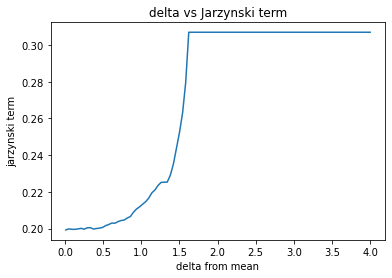

In [346]:
print(f"mean work done = {workDoneDataArray[0][1]}")

plt.title("delta vs Jarzynski term")
plt.xlabel("delta from mean")
plt.ylabel("jarzynski term")
plt.plot(workDoneDataArray[:, -1], np.abs(workDoneDataArray[:, -2]))

# dt_sweep

In [11]:
sweepObject = {
    "lambda":   0.5,
    "N":        10_000,
    #"dt":       [1/1_000, 1/5_000, 1/10_000, 1/50_000, 1/100_000],
    "dt":       [1/500_000, 1/1_000_000],
    "k":        np.pi**2,
    "tau":      1,
    "depth":    1,
    "location": 1
}

parameter = "dt"
label = "dt_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True)

========== start (1/2) ==========
lambda_0.5_N_10000_dt_2e-06_k_9.8696_tau_1_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10033 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.591656192260792
========== finished (1/2) ==========
========== start (2/2) ==========
lambda_0.5_N_10000_dt_1e-06_k_9.8696_tau_1_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10032 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.5905063331950529
========== finished (2/2) ==========


dt_sweep
[0.001, 0.0002, 0.0001, 2e-05, 1e-05]
[100.0, 100.0, 100.0, 100.0, 100.0]
[1.584647149660738, 1.5871545752225018, 1.587769756067623, 1.6011414678097349, 1.5957725540261338]


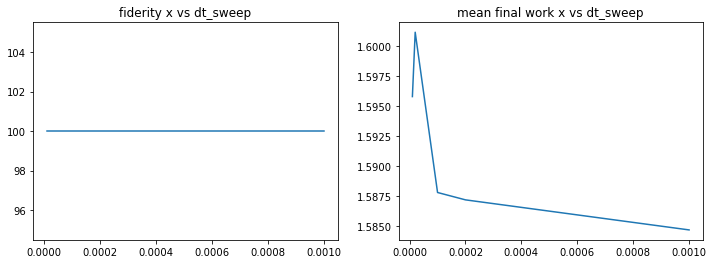

In [10]:
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label)

# k_sweep

In [69]:
sweepObject = {
    "lambda":   0.5,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.linspace(1, 10, 9),
    "tau":      1,
    "depth":    1,
    "location": 1
    
}

parameter = "k"
label = "k_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True)

========== start (1/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_1_tau_1_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (1.0, 1.0)]
 found 10027 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 98.5
meanFinalWork = 0.6257530770394865
========== finished (1/9) ==========
========== start (2/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_2.125_tau_1_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (2.125, 2.125)]
 found 10005 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 99.5
meanFinalWork = 0.7337714366442192
========== finished (2/9) ==========
========== start (3/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_3.25_tau_1_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (3.25, 3.25)]
 found 10037 samples out of 10000
 running sim...

 analyzing output...
fidelity_

k_sweep
[1.0, 2.125, 3.25, 4.375, 5.5, 6.625, 7.75, 8.875, 10.0]
[97.5, 98.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.5, 100.0]
[0.6272282846859902, 0.7418414670983989, 0.8666131175600654, 1.0064612608399899, 1.133294605209016, 1.2648888957755036, 1.376149516415272, 1.5003021265708154, 1.605604248504988]


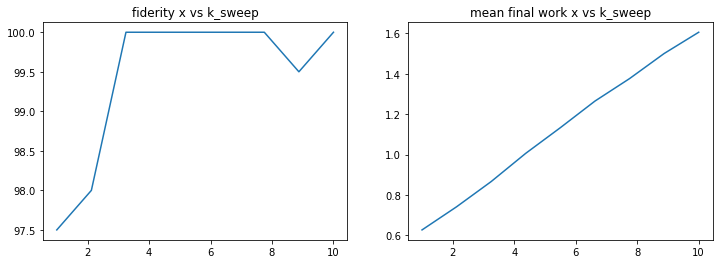

In [68]:
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label)

# tau_sweep

In [72]:
sweepObject = {
    "lambda":   0.5,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.pi**2,
    "tau":      np.linspace(0.5, 5, 8),
    "depth":    1,
    "location": 1
}

# how long the protocol, relation between tau and k

parameter = "tau"
label = "tau_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True)

========== start (1/8) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_0.5_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10015 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.6101772705455206
========== finished (1/8) ==========
========== start (2/8) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1.1429_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10054 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.591708286806516
========== finished (2/8) ==========
========== start (3/8) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1.7857_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.

tau_sweep
[0.5, 1.1428571428571428, 1.7857142857142858, 2.428571428571429, 3.0714285714285716, 3.7142857142857144, 4.357142857142858, 5.0]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[1.6101772705455206, 1.591708286806516, 1.588608025018252, 1.5836997118860727, 1.6059757771146148, 1.5851443348030336, 1.5964280268061113, 1.5817001545714713]


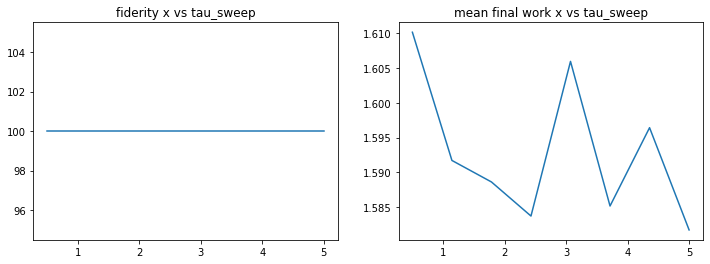

In [73]:
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label)

# depth sweep

In [74]:
heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)

sweepObject = {
    "lambda":   0.5,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.pi**2,
    "tau":      1,
    "depth":    np.linspace(1, 4, 9),
    "location": 1
    
}

label = "depth_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True)

========== start (1/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1
- This set of parameter is already simulated.
- Nothing is saved.
- Skip to the next paramter.

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10038 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.5865613504873617
========== finished (1/9) ==========
========== start (2/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1.375_location_1

 initializing...
the parameters:  [(1.375, 1.375), (-5.5, -5.5)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10024 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.64353492143105
========== finished (2/9) ==========
========== start (3/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1.75_location_1

 initializing...

depth_sweep
[1.0, 1.375, 1.75, 2.125, 2.5, 2.875, 3.25, 3.625, 4.0]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[1.5865613504873617, 1.64353492143105, 1.7132574941446614, 1.7929137924154093, 1.883721828964067, 1.956253088450803, 2.0408294526562636, 2.1200584370422066, 2.192951972771929]


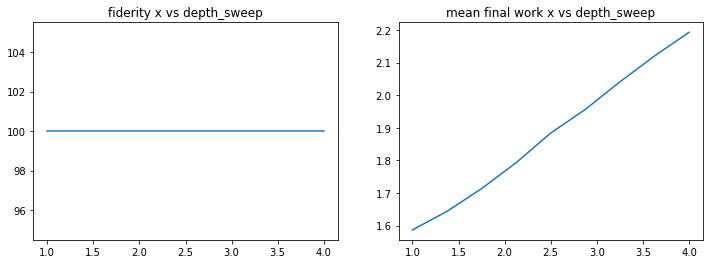

In [75]:
parameter = "depth"
label = "depth_sweep"

heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label)

# location sweep

In [76]:
heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)

sweepObject = {
    "lambda":   0.5,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.pi**2,
    "tau":      1,
    "depth":    1,
    "location": np.linspace(1, 3, 9)
    
}

parameter = "location"
label = "location_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True)

========== start (1/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1
- This set of parameter is already simulated.
- Nothing is saved.
- Skip to the next paramter.

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10010 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 99.5
meanFinalWork = 1.594692948896861
========== finished (1/9) ==========
========== start (2/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1.25

 initializing...
the parameters:  [(0.4096, 0.4096), (-2.56, -2.56)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10081 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 2.477828607728142
========== finished (2/9) ==========
========== start (3/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1.5

 initializing..

location_sweep
[1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]
[99.5, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[1.594692948896861, 2.477828607728142, 3.2099632946331775, 3.5285106057306184, 3.5684419576044952, 3.5368292058904918, 3.41562711025522, 3.296387108470399, 3.22639861878555]


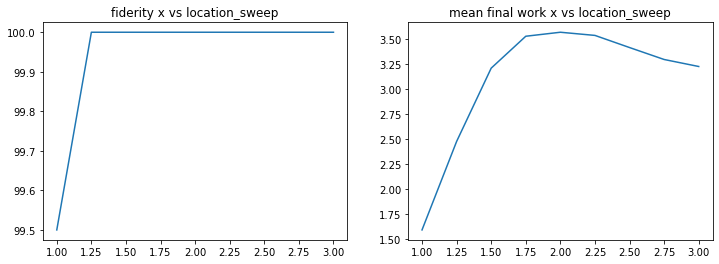

In [77]:
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label)

In [660]:
%%time
bfr.run_sim(verbose=True)


 initializing...
 found 5001 samples out of 5000
 running sim...

 analyzing output...
CPU times: user 549 ms, sys: 68.4 ms, total: 617 ms
Wall time: 708 ms


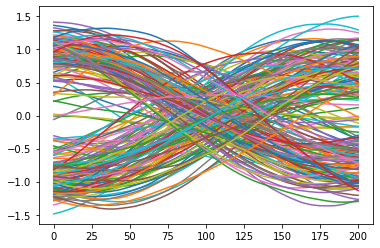

In [662]:
#here is a quick trajectory trace
allstate = bfr.sim.output.all_state['states']
plt.plot(allstate[:,:,0,0].transpose());

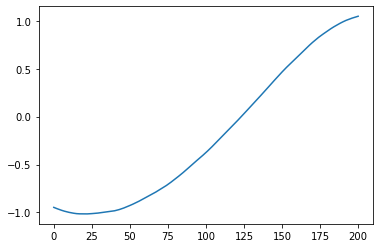

In [670]:
plt.plot(allstate[0,:,0,0]);

In [ ]:
def setup_sim(system, init_state, procedures=None, sim_params=None, dt=1/200, damping=1, temp=1, extra_time=1):
    print(f" system: {system},\n init_state: {init_state},\n procedures: {procedures},\n " +
          f"sim_params: {sim_params},\n dt: {dt},\n damping: {damping},\n" +
          f" temp: {temp},\n extra_time: {extra_time}")
    
sim_kwargs = {'damping': "damping",
          'temp': "T", 
          'dt':"dt", 
          'procedures':"proceudures",
          'sim_params': [1, 1, 0]
         }

setup_sim("system", "init_state", **sim_kwargs)

In [85]:
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR

# generate some sample data
np.random.seed(123)
data = np.random.randn(100, 2)
df = pd.DataFrame(data, columns=['X', 'Y'])

# fit a VAR model to the data
model = VAR(df)
results = model.fit()

# test for Granger causality from X to Y
test_result = results.test_causality(['X'], ['Y'], kind='f')

# print the test result
print('Granger causality from X to Y:', test_result.pvalue)

Granger causality from X to Y: 0.8297989774089181


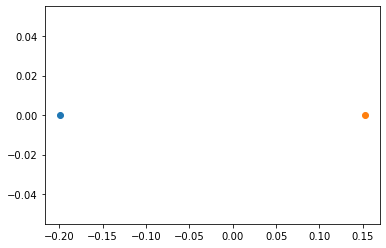

In [111]:
plt.scatter(bfr.sim.output.all_state["states"][1, 0, 0, 0], 0);
plt.scatter(bfr.sim.output.all_state["states"][1, -1, 0, 0], 0);


In [110]:
bfr.sim.output.all_state["states"][0, 0,...]

array([[1.40129021, 0.1007816 ]])

# testing for probability distribution

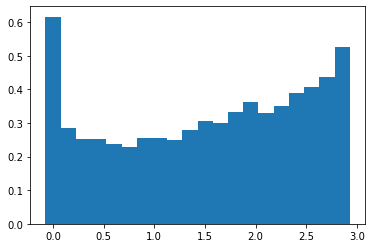

In [349]:
# Generate some random data

# Compute the histogram
hist, bins = np.histogram(bfr.sim.output.final_W, bins=20, density=False)

# Normalize the histogram to obtain a probability distribution
bin_widths = np.diff(bins)
probabilities = hist / (np.sum(hist) * bin_widths)

# Plot the probability distribution
plt.bar(bins[:-1], probabilities, width=bin_widths)

plt.show()

In [368]:
sim

NameError: name 'sim' is not defined

In [442]:
Y = np.random.normal(2, 10, 10)
print(Y)

[10.67865942 -3.53373134 12.79520484 -6.01217812 -2.44346863 13.749796
  2.09812298 -5.68272716  0.92219143  2.85018184]


In [443]:
X = np.linspace(0, len(Y)-1, len(Y), dtype = int)

In [454]:
index = np.r_[Y[:-1] < Y[1:]]

In [465]:
X[np.r_[Y[:-1] < Y[1:], False]]

array([1, 3, 4, 7, 8])

In [467]:
h = 6.63e-34
m = 32 * 1.67e-27
k_B = 1.38e-23
V = 10**-6

In [469]:
T = h**2 / (2*np.pi * m * k_B * V**(2/3))
print(T)

9.486404796380242e-16
